In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = load_wine()

In [3]:
x = pd.DataFrame(data=data.data, columns=data.feature_names)

In [5]:
y = pd.DataFrame(data=data.target)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80)

In [13]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_test = knn_model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.6111111111111112

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred_test = knn_model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.5833333333333334

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_test = knn_model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.6111111111111112

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train, y_train)
y_pred_test = knn_model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.6111111111111112

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(x_train, y_train)
y_pred_test = knn_model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.6388888888888888

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(x_train, y_train)
y_pred_test = knn_model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.7222222222222222

In [22]:
std_scalar = StandardScaler()

In [23]:
scaled_data = std_scalar.fit_transform(x)

In [24]:
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [25]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, train_size=0.80)

In [27]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_test = knn_model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.9444444444444444

In [66]:
cv_scores = []
for i in range(1, 31, 1):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    # k_fold = KFold(n_splits=5, shuffle=True, random_state=12)
    cross_validation_score = cross_val_score(estimator=knn_model, X=scaled_data, y=y, cv=5)
    cv_scores.append(cross_validation_score)

In [67]:
cv_score

[array([0.91666667, 0.94444444, 0.97222222, 1.        , 0.91428571]),
 array([0.88888889, 0.94444444, 0.94444444, 1.        , 0.91428571]),
 array([0.88888889, 0.94444444, 0.97222222, 1.        , 0.91428571]),
 array([0.86111111, 0.94444444, 0.97222222, 1.        , 0.91428571]),
 array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.91428571]),
 array([0.91666667, 0.94444444, 0.97222222, 1.        , 0.91428571]),
 array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.97142857]),
 array([0.91666667, 0.97222222, 0.97222222, 1.        , 0.97142857]),
 array([0.91666667, 0.94444444, 0.94444444, 0.97142857, 0.97142857]),
 array([0.91666667, 0.94444444, 0.97222222, 1.        , 0.94285714]),
 array([0.94444444, 0.94444444, 0.94444444, 1.        , 0.94285714]),
 array([0.91666667, 0.94444444, 0.97222222, 1.        , 0.94285714]),
 array([0.91666667, 0.94444444, 0.97222222, 1.        , 0.94285714]),
 array([0.91666667, 0.94444444, 0.97222222, 1.        , 0.94285714]),
 array([0.94444444, 

In [68]:
np.array(cv_scores).argmax()

3

In [69]:
np.array(cv_scores).max()

1.0

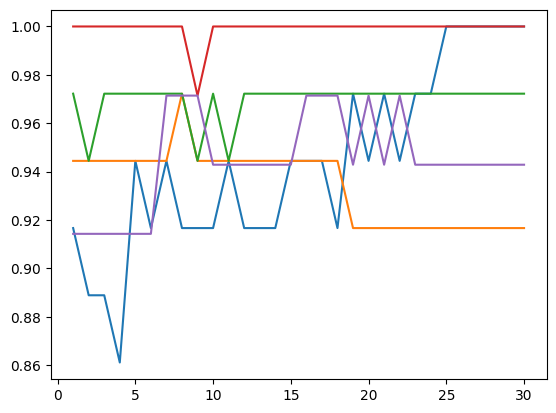

In [70]:
plt.plot(range(1, 31, 1), cv_score)
plt.show()